# **CARS 4 YOU: WE BUY YOUR CAR!!!**
### [Group Member Contribution](#gmc)
### [Abstract](#abs)
### [1. Identifying Business Needs](#section-1)
  * [1.1 Overview and Main Goals](#1.1-overview-and-main-goals)
  * [1.2 Process and Model Assessment Strategy](#1.2-process-and-model-assessment-strategy)
### [2. Data Exploration and Preprocessing](#section-2)
* [2.1 Setup Environment and Datasets Import](#2.1-setup-environment-and-datasets-import)
* [2.2 Data Quality Issues and Preprocessing Requirements](#2.2-data-quality-issues-and-preprocessing-requirements)
  * [2.2.1 General View](#2.2.1-general-view)
  * [2.2.2 Visualization of Outliers through Box Plot](#2.2.2-visualization-of-outliers-through-box-plot)
  * [2.2.3 Categorical Data Inconsistencies and Mapping Strategy](#2.2.3-categorical-data-inconsistencies-and-mapping-strategy)
* [2.3 Feature Correlation with *Target Variable* Analysis](#2.3-feature-correlation-with-target-variable-analysis)
* [2.4 Preprocessing Function Defining](#2.4-preprocessing-function-defining)
### [3. Regression Benchmarking](#section-3)
* [3.1 Feature Selection Strategy](#3.1-feature-selection-strategy)
  * [3.1.1 Why this approach?](#3.1.1-why-this-approach?)
  * [3.1.2 Defining of the Function](#3.1.2-defining-of-the-function:)
* [3.2 Model Assessment Strategy](#3.2-model-assessment-strategy)
  * [3.2.1 Why Cross Validation?](#3.2.1-why-cross-validation?)
  * [3.2.2 Defining of the Function](#3.2.2-defining-of-the-function:)
  * [3.2.3 Performance Metrics Used](#3.2.3-performance-metrics-used)
* [3.3 Testing Candidate Models](#3.3-testing-candidate-models)
  * [3.3.1 Testing `LinearRegression()`](#3.3.1-testing-linearregression())
  * [3.3.2 Testing `Ridge()`](#3.3.2-testing-ridge())
  * [3.3.3 Testing `Lasso()`](#3.3.3-testing-lasso())
  * [3.3.4 Testing `MLPRegressor()`](#3.3.4-testing-mlpregressor())
  * [3.3.5 Testing `RandomForestRegressor()`](#3.3.5-testing-randomforestregressor())
* [3.4 Results and Comparison of Performance](#3.4-results-and-comparison-of-performance)
### [4. Deployment](#section-4)
* [4.1 Preprocessing for Training and Test Sets](#4.1-preprocessing-for-training-and-test-sets)
* [4.2 Feature Selection for Training and Test Sets](#4.2-feature-selection-for-training-and-test-sets)
* [4.3 Prediction on Test Set](#4.3-prediction-on-test-set)
### [5. Open-Ended Section](#section-5)
* [5.1 Introduction](#5.1-introduction)
* [5.2 Results](#5.2-results)

<a id="gmc"></a>

# Group Member Contribution

**Diana Pereira** *(20250493)* - `20%`:

- Abstract 
- Section 1: Identifying Business Needs 
- Section 5: Open-Ended Section

**Giosuè Morelli** *(20250472)* - `30%`:

- Section 2.2: Data Exploration and preprocessing 
- Section 2.2.2 - 2.2.3: Visualizations and categorical cleaning 
- Section 2.3 - 2.4: Feature Correlation and preprocessing function

**Lorenzo Simonazzi** *(20250402)* - `30%`:

- Section 3.1-3.3: Feature selection and regression benchmarking 
- Section 3.4: Results and comparison of performance 
- Section 4: Deployment preparation

**Mariana Leonardo** *(20250450)* - `20%`:

- Section 2.1: Loaded datasets and set up the environment
- Support through section 2: Assisted with data quality checks 
- Section 4.1: Assisted in preprocessing for deployment

<a id="abs"></a>

# Abstract

Faced with long customer wait times due to manual car evaluations, **Cars 4 You needed a faster and automated way to estimate used car prices.** Our goal was to build a predictive model that estimates car prices from user-inputted features, reducing wait times and providing clear, data-driven explanations to customers.

**We started by cleaning and preparing a large dataset of over 75 000 past car listings.** This involved fixing errors like negative mileage, standardizing misspelled brand names, and creating new, insightful features like the car´s age and average yearly mileage. To ensure our model would perform reliably on new data, we **built a training pipeline that avoids data leakage**, a common pitfall where information from the future influences the model´s training.

We then **tested several different machine learning algorithms**. While simpler linear models provided a decent baseline, a **Random Forest model** proved to be the winner. It achieved an **exceptional accuracy score** (R^2 of 0.97), meaning it explains nearly all the variation in the car prices, and its average prediction error was under $1000. It also showed no signs of overfitting, performing just as well on new data as it did on the data it was trained on.

The final model was used to generate price predictions and to help us understand why a car is valued a certain way. The most influential factors were the **car´s engine size, age and fuel efficiency (mpg).** In fact, just eight key features were responsible for 90% of the model decision making, which highlights where customers and the company should focus their attention. 

In conclusion, **this automated pricing system can speed up Cars 4 You initial evaluation process and also provides transparent, insight-driven price justifications** which enhances customer trust and supports strategic decision-making


<a id="section-1"></a>

# 1. Identifying Business Needs

### 1.1 Overview and Main Goals
Cars 4 You is currently facing significant operational challenges due to a sharp increase in requests for used car evaluations. The current process, reliant on physical inspections by mechanics, creates long waiting times and drives many potential customers to competitors.
The main goal is to expedite the evaluation process by creating a predictive model capable of evaluating the price of a car based on the user’s input without needing the car to be taken to a mechanic.
Beyond prediction, the project also aims to analyze which variables most significantly influence price, enabling the company to provide clear, motivated explanations to customers and increase trust in the service.

### 1.2 Process and Model Assessment Strategy
To ensure the model is reliable and generalizable to unseen data, we adopted a robust **5-Fold Cross-Validation** strategy combined with a **Randomized Search** for hyperparameter optimization.
The procedure follows these critical steps:
*   **Iterative Cross-Validation:** The dataset is split into training and validation sets 5 times (5 folds).
*   **Data Leakage Prevention:** All preprocessing steps are performed strictly *within* each fold (fitted only on the partial training set and applied to the validation set) to prevent future information from "leaking" into the model.
*   **Feature Selection (RFE):** We utilize Recursive Feature Elimination (RFE) to identify the most relevant feature sets and discard noise.
*   **Optimization:** A **Randomized Search** explores various hyperparameter combinations to maximize final model performance.

The expected outcome is a general predictive model ready for immediate use on new data, alongside a clear understanding of the most important features determining used car prices.

<a id="section-2"></a>

# 2. Data Exploration and Preprocessing

### 2.1 Setup Environment and Datasets Import

Before beginning the analysis, we need to set up a **standard data science environment** by importing the essencial libraries at the start of the notebook. This libraries will allow us to explore, model and visualize the data.

In [1]:
import numpy as np
import pandas as pd
import os
import time

import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

import scipy.stats as stats
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import KFold, StratifiedKFold, RandomizedSearchCV
from math import ceil
from sklearn.base import clone
from scipy.stats import randint, loguniform
from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings("ignore")

RSEED = 42
np.random.seed(RSEED)

- Load the datasets into a pandas dataframe:
     - **train:** contains the training data, that will be used to build and validate the model
     - **test:** will later be used to generate final predictions
     - **sample_submission:** provides the format for submitting predictions

In [ ]:
train = pd.read_csv("data/train.csv") #Load the training dataset
test = pd.read_csv("data/test.csv") #Load the test dataset
sample_submission = pd.read_csv("data/sample_submission.csv")

- Define the **features types**, that are categorized in metric and non metric. We also define the target variable, which will be the **price** column which is only available in the training dataset, and is designated as the target variable. These variables are the ones we will use in our models.

In [4]:
#Define feature types
metric_features= ["mileage","tax","mpg","engineSize","previousOwners"] 
non_metric_features= ["Brand","fuelType","transmission"]

#Separate predictors and target
x= train.drop("price",axis=1) #features (all columns except the target)
y= train["price"] #target variable

### 2.2 Data Quality Issues and Preprocessing Requirements

The automotive dataset exhibits typical characteristics of real-world data, with significant quality issues spanning numeric outliers, missing values, and categorical inconsistencies that require systematic preprocessing. This section details the identified anomalies across all features and outlines the targeted remediation strategies to ensure data consistency and model reliability.

#### 2.2.1 General View
**1. Missing Data Patterns:**
   - `tax` and `mpg` show significant incompleteness with only approximately 68,000 valid records out of 75,973
   - `hasDamage` has minimal variance (all values are 0.0), indicating that this feature has no discriminative power for prediction.

**2. Data Anomalies and Outliers:**
   - `mileage`: The negative minimum value (*-58,540.57*) indicates data entry errors that require correction through outlier capping.
   - `tax`: Negative values (*-91.12*) are logically inconsistent and require preprocessing.
   - `mpg`: Negative values (*-43.42*) are physically impossible and must be treated as anomalies.
   - `engineSize`: Small negative value (*-0.10*) represents an additional data anomaly that requires appropriate preprocessing.
   - `year` and `previousOwners`: Both variables are stored as float despite representing discrete count data and require type conversion to integer, `previousOwners` additionally exhibits logically invalid negative minimum value (*-2.35*) thus adequate preprocessing is required (outlier capping).

**3. Distributional Characteristics:**
   - `year`: Heavily concentrated in *2016-2019* (IQR = 3 years), with a mean of *2017*
   - `mileage`: Right-skewed distribution (positive skewness) with large dispersion (std = *22129.79*)
   - `tax`: Concentrated around *145* (median and 75th percentile), with low variability except for outliers reaching 580, highlighting the need for robust outlier treatment.
   - `mpg`: Relatively symmetric distribution around *54.3* (median), with reasonable dispersion (std = *16.50*)
   - `engineSize`: Concentrated between *1.2 and 2.0* (IQR), typical for vehicles, with some high-performance outliers up to *6.6*
   - `previousOwners`: Discrete distribution concentrated around *1-3* previous owners (IQR), with a mean of *2*

**4. Identified Preprocessing Requirements:**
   - **Outlier Treatment:** Multiple features require IQR-based capping to handle impossible values (`mileage`, `tax`, `mpg`, `engineSize`).
   - **Missing Value Imputation:** Develop strategies for missing values in key features (`tax`, `mpg`, `mileage`).
   - **Data Type Conversion:** Convert from float to integer type to ensure proper data representation (`year`, `previousOwners`).

#### *Summary*:

The dataset exhibits typical characteristics of real-world automotive data with significant quality issues that require systematic preprocessing. The identified anomalies (negative values, out-of-range percentages, incorrect dtypes) must be addressed through robust outlier capping, type conversion, and imputation strategies before model training. The high rate of missing data in `tax` and `mpg`, suggests that feature engineering will be necessary to maximize model performance.

In [5]:
x.shape

(75973, 13)

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 7.5+ MB


In [7]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
carID,75973.0,37986.000000,21931.660338,0.000000,18993.00,37986.0,56979.0,75972.000000
year,74482.0,2017.096611,2.208704,1970.000000,2016.00,2017.0,2019.0,2024.121759
mileage,74510.0,23004.184088,22129.788366,-58540.574478,7423.25,17300.0,32427.5,323000.000000
tax,68069.0,120.329078,65.521176,-91.121630,125.00,145.0,145.0,580.000000
mpg,68047.0,55.152666,16.497837,-43.421768,46.30,54.3,62.8,470.800000
engineSize,74457.0,1.660136,0.573462,-0.103493,1.20,1.6,2.0,6.600000
paintQuality%,74449.0,64.590667,21.021065,1.638913,47.00,65.0,82.0,125.594308
previousOwners,74423.0,1.994580,1.472981,-2.345650,1.00,2.0,3.0,6.258371
hasDamage,74425.0,0.000000,0.000000,0.000000,0.00,0.0,0.0,0.000000


#### 2.2.2 Visualization of Outliers through Box Plot

The box plots of numeric variables reveal the distribution and presence of outliers in each feature, clearly highlighting the need for treatment through capping with the IQR method.

#### *Analysis by Feature:*

**1. `mileage`**
- **Distribution:** Heavily skewed with numerous outliers on the right, indicating wide variability in vehicle `mileage`.
- **Evident Outliers:** Extremely high values well separated from the main body of the distribution.
- **Implication:** Requires IQR capping to normalize the distribution.

**2. `tax`**
- **Distribution:** Concentrated in the main body with some isolated outliers on the right.
- **Identified Outliers:** Anomalous values well distant from the main mass, indicating exceptionally high taxes.
- **Implication:** Capping is necessary to reduce the impact of these anomalous values.

**3. `mpg` (Miles per Gallon)**
- **Distribution:** Moderately concentrated around the median with outliers on the right.
- **Moderate Outliers:** Physically implausible values indicating measurement or data entry errors.
- **Implication:** Evident outliers require correction through capping.

**4. `engineSize`**
- **Distribution:** Concentrated and symmetric in the main body with some outliers on the right.
- **Present Outliers:** Extreme values representing high-performance engines, but minority.
- **Implication:** Capping protects against anomalous vehicles without losing relevant information.

**5. `previousOwners`**
- **Distribution:** Concentrated and discrete with some outliers on the right.
- **Rare Outliers:** Extreme values infrequently occurring but present.
- **Implication:** Capping brings these values back within the plausible range.

#### *Conclusion:*

All box plots clearly confirm the necessity of **IQR capping** to treat outliers in all numeric variables. This preprocessing step is essential because outliers can distort model training by inflating feature variance and leading to poor predictions. Capping outliers ensures the model learns from representative data and improves prediction accuracy.


Text(0.5, 0.98, 'Numeric Variables: Box Plots')

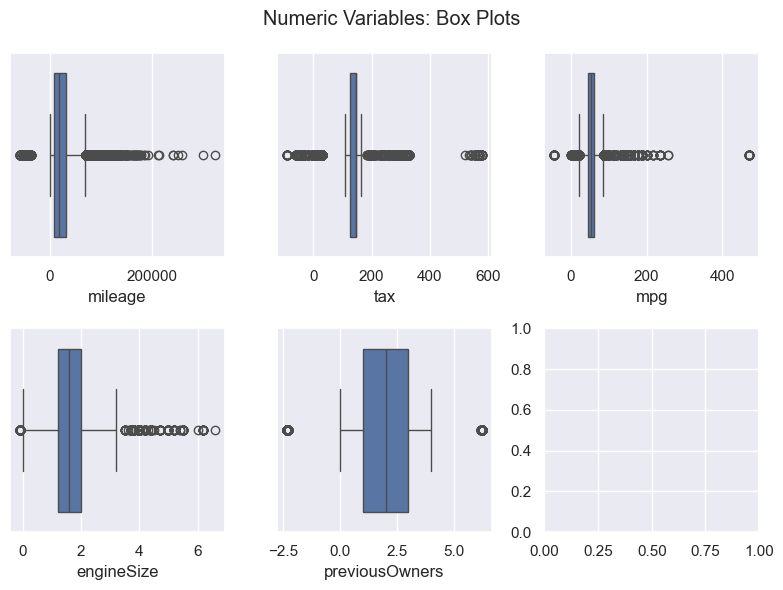

In [8]:
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows) 
fig, axes = plt.subplots(sp_rows, sp_cols, figsize=(8, 6),tight_layout=True)

for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=x[feat], ax=ax)
    
plt.suptitle("Numeric Variables: Box Plots")

#### 2.2.3 Categorical Data Inconsistencies and Mapping Strategy

This analysis reveals critical data quality issues in categorical features:

**1. `brand`**
- **Identified Anomalies:** Multiple variations of the same brand due to case inconsistencies (uppercase, lowercase, mixed case) and truncated/erroneous entries (e.g., 'Mercede' instead of 'Mercedes', 'For' instead of 'Ford', 'V' or 'W' or 'vw' instead of 'VW').
- **Impact:** Creates artificial fragmentation with dozens of unique values instead of the expected ~10 major automotive brands.
- **Resolution:** `brand` standardization mapping will consolidate all variations into canonical brand names.

**2. `transmission`**
- **Identified Anomalies:** Significant variation in how transmission types are recorded, including case variations (Manual, manual, MANUAL), truncated entries (Manua, anual, nual), and spelling errors (automatI, utomatic, emi-auto).
- **Impact:** Fragmentation of transmission types into dozens of unique values when there should be only 4 categories (Manual, Semi-Auto, Automatic, Unknown).
- **Resolution:** `transmission` mapping will consolidate all variations into four standard categories.

**3. `fuelType`**
- **Identified Anomalies:** Case inconsistencies (Petrol, petrol, PETROL), truncated entries (Petro, etrol, ETROL for Petrol; Diese, iese, iesel for Diesel; Hybri, ybrid for Hybrid), and erroneous entries (Other, ther).
- **Impact:** Creates unnecessary fragmentation with dozens of unique values instead of the 5 standard fuel types (Petrol, Diesel, Hybrid, Electric, Unknown).
- **Resolution:** `fuelType` mapping will standardize all entries into five canonical categories.

**4. `model`**
- The `model` variable was excluded from the analysis due to excessive cardinality (735 unique values) and the inability to validate and standardize all vehicle model entries reliably. Consequently, we focused our analysis on the more manageable and standardizable categorical features.

#### *Preprocessing Action:*

All identified anomalies will be corrected using mapping dictionaries that will consolidate all variations of each category into standard values.
This systematic approach ensures data consistency and prevents model degradation caused by artificial feature fragmentation.

In [9]:
for col in x.select_dtypes(include = "object"):
    print(f"\nColumn: {col}") 
    print(x[col].value_counts()) #display the count of each unique value for each column


Column: Brand
Brand
Ford        14808
Mercedes    10754
VW           9780
Opel         8645
BMW          6968
            ...  
kod             2
TOYOT           1
SKOD            1
skod            1
toyot           1
Name: count, Length: 72, dtype: int64

Column: model
model
 Focus        6353
 C Class      4886
 Fiesta       4130
 Golf         3081
 Corsa        2182
              ... 
UP               1
 scal            1
 Fox             1
astra            1
 glb class       1
Name: count, Length: 735, dtype: int64

Column: transmission
transmission
Manual       38050
Semi-Auto    15545
Automatic    14003
anual          804
MANUAL         801
manual         770
Manua          759
unknown        690
 Manual        366
Semi-Aut       332
emi-Auto       325
semi-auto      324
utomatic       313
SEMI-AUTO      309
Automati       304
AUTOMATIC      289
automatic      282
unknow          18
Manual          16
UNKNOWN         14
ANUAL           13
nknown          13
anua            12
SE

In [10]:
#Check the current unique values and their counts
x["fuelType"].value_counts()

# Removing anomalies from  fuel type 
fuel_mapping = {'Petrol': 'Petrol',
    'petrol': 'Petrol',
    'PETROL': 'Petrol',     
    'Petro': 'Petrol',
    'petro': 'Petrol',
    'PETRO': 'Petrol',
    'etrol': 'Petrol',
    'ETROL': 'Petrol',
                
    'Diesel': 'Diesel',
    'diesel': 'Diesel',
    'DIESEL': 'Diesel',
    'Diesen': 'Diesel',
    'Dieses': 'Diesel',
    'Dieses': 'Diesel',
    'diese': 'Diesel',
    'DIESE': 'Diesel',
    'iese': 'Diesel',
    'iesel': 'Diesel',
    'IESEL': 'Diesel',
                
    'Hybrid': 'Hybrid',
    'hybrid': 'Hybrid',
    'HYBRID': 'Hybrid',
    'Hybri': 'Hybrid',
    'HYBRI': 'Hybrid',
    'ybrid': 'Hybrid',
    'YBRID': 'Hybrid',
                
    'Electric': 'Electric',
    'electric': 'Electric',
                
    'Unknown': 'Unknown',
    'Other': 'Unknown',}

#Apply the mapping to both training and validation datasets
#Any unknown or missing value is filled as unknown
x['fuelType'] = x['fuelType'].map(fuel_mapping).fillna("Unknown")


#Check the cleaned result
x["fuelType"].value_counts()


fuelType
Petrol      41163
Diesel      30302
Unknown      2280
Hybrid       2224
Electric        4
Name: count, dtype: int64

In [11]:
#the same as in the previous one

x["transmission"].value_counts()

transmission_mapping = {
    'Manual': 'Manual',
    'manual': 'Manual',
    'MANUAL': 'Manual',
    'Manua': 'Manual',
    'Manua': 'Manual',
    'anual': 'Manual',
    'nual': 'Manual',
    'ANUAL': 'Manual',
    
    'Semi-Auto': 'Semi-Auto',
    'Semi-Aut': 'Semi-Auto',
    'Semi-aut': 'Semi-Auto',
    'semi-Auto': 'Semi-Auto',
    'semi-auto': 'Semi-Auto',
    'emi-Auto': 'Semi-Auto',
    'emi-auto': 'Semi-Auto',
    'SEMI-AUTO': 'Semi-Auto',

    'Electric': 'Electric',  
    'electric': 'Electric',   
    'ELECTRIC': 'Electric',
    
    'Automatic': 'Automatic',
    'automatic': 'Automatic',
    'AUTOMATIC': 'Automatic',
    'Automati': 'Automatic',
    'utomatic': 'Automatic',
    'automatI': 'Automatic',
    
    'Unknown': 'Unknown',
    'unknown': 'Unknown',
    'UNKNOWN': 'Unknown',
    'unknow': 'Unknown',
    'nknow': 'Unknown',
    'Other': 'Unknown',}

x['transmission'] = x['transmission'].map(transmission_mapping).fillna("Unknown")

x["transmission"].value_counts()

transmission
Manual       41197
Semi-Auto    16845
Automatic    15191
Unknown       2740
Name: count, dtype: int64

In [12]:
#the same as in the previous ones

brand_mapping = {
    'Mercedes': 'Mercedes', 'mercedes': 'Mercedes', 'MERCEDES': 'Mercedes', 'Mercede': 'Mercedes', 'MERCEDE': 'Mercedes',
    'ercedes': 'Mercedes', 'ercdes': 'Mercedes', 'ERCEDES': 'Mercedes',

    'Ford': 'Ford', 'ford': 'Ford', 'FORD': 'Ford', 'For': 'Ford', 'for': 'Ford', 'FOR': 'Ford', 'ord': 'Ford', 'ORD': 'Ford',

    'Hyundai': 'Hyundai', 'hyundai': 'Hyundai', 'HYUNDAI': 'Hyundai', 'Hyunda': 'Hyundai', 'hyunda': 'Hyundai', 'HYUNDA': 'Hyundai',
    'yundai': 'Hyundai', 'yunda': 'Hyundai',

    'VW': 'VW', 'vw': 'VW', 'V': 'VW', 'v': 'VW', 'W': 'VW', 'w': 'VW',

    'Opel': 'Opel', 'opel': 'Opel', 'OPEL': 'Opel', 'Ope': 'Opel', 'ope': 'Opel', 'OPE': 'Opel', 'pel': 'Opel', 'PEL': 'Opel',

    'Audi': 'Audi', 'audi': 'Audi', 'AUDI': 'Audi', 'udi': 'Audi', 'UDI': 'Audi', 'aud': 'Audi', 'Aud': 'Audi',

    'Toyota': 'Toyota', 'toyota': 'Toyota', 'TOYOTA': 'Toyota', 'Toyot': 'Toyota', 'toyot': 'Toyota', 'TOYOT': 'Toyota',
    'oyota': 'Toyota', 'ud': 'Toyota', 'pe': 'Toyota',

    'BMW': 'BMW', 'bmw': 'BMW', 'MW': 'BMW', 'mw': 'BMW', 'BM': 'BMW',

    'Skoda': 'Skoda', 'skoda': 'Skoda', 'SKODA': 'Skoda', 'Skod': 'Skoda', 'skod': 'Skoda', 'KODA': 'Skoda', 'koda': 'Skoda',

    'Unknown': 'Unknown'}

x['Brand'] = x['Brand'].map(brand_mapping).fillna("Unknown")


x["Brand"].value_counts()

Brand
Ford        16056
Mercedes    11664
VW          10385
Opel         9348
BMW          7392
Audi         7320
Toyota       4627
Skoda        4300
Hyundai      3336
Unknown      1545
Name: count, dtype: int64

### 2.3 Feature Correlation with *Target Variable* Analysis

The correlation matrix visualizes the linear relationships between all numeric variables in the dataset, with particular attention to the correlation with the target variable `price`.

#### *Heatmap Interpretation:*

- **Positive Correlations with `price` (Target):**
  - `engineSize` (0.61): Moderate-positive correlation. Vehicles with larger engines tend to have higher prices. This is the numeric feature with the strongest correlation with price, suggesting high importance in the predictive model.
  - `tax` (0.30): Weak-positive correlation. Road tax is slightly correlated with price; more expensive cars tend to have higher taxes.
  - `mpg` (-0.29): Weak-negative correlation. Counterintuitively, higher fuel consumption (higher mpg) is associated with slightly lower prices, suggesting that more fuel-efficient cars are more economical.<br><br>
  
- **Negative Correlations with `price`:**
  - `mileage` (-0.41): Moderate-negative correlation. It is the second strongest correlation (in absolute value). Cars with higher mileage have significantly lower prices, as expected in the used car market.<br><br>

- **Non-Correlated with `price`:**
  - `previousOwners` (−0.00): Practically zero correlation. The number of previous owners has no linear relationship with price in the dataset. This feature may have limited utility in the predictive model.

#### *Implications:*

1. **Relevant Features:** `engineSize` and `mileage` are the numeric features with the strongest correlations with `price` and should have high importance in the model.

2. **Multicollinearity:** There is no extreme multicollinearity among features (no correlation > 0.7 between different features), which favors the stability of the regression model.

3. **Feature Selection:** `previousOwners` shows zero correlation with `price` and could be considered for exclusion or as a candidate for elimination during the feature selection process via RFE.

4. **Feature Interdependence:** The moderate correlation between `tax` and `mpg`, as well as between `engineSize` and `mpg`, suggests potential redundant information; however, they remain distinct features with complementary information useful for prediction.

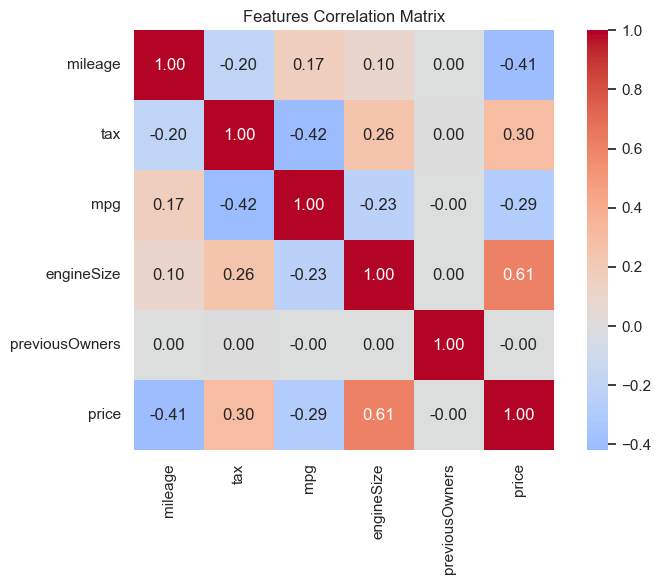

In [13]:
correlation_with_price = pd.concat([x[metric_features], y], axis=1).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_with_price, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Features Correlation Matrix')
plt.tight_layout()
plt.show()

### 2.4 Preprocessing Function Defining

To ensure reproducibility and streamline the machine learning pipeline, a dedicated `preprocessing_train_val` function has been developed to automate all preprocessing steps. This function will be integrated into the cross-validation framework to maintain consistency across all training and validation folds, this function performs essential data preprocessing steps for machine learning, specifically for the training and validation sets. The procedure includes:

- **Outlier Capping**: uses the IQR method to cap extreme values in numeric features, reducing the impact of outliers on the model using the following formula: Q1/Q3 ± 1.5 * IQR.
- **Missing Value Imputation and dtypes conversion**: convert dtypes where needed (`year` and `previousOwners`) and replaces missing values in numeric features with the median from the training set, and in categorical features with a placeholder ("Unknown").
- **Feature Engineering**: creates new variables such as `usage_year` (years since the car was produced) and `avg_miles` (average miles per year), improving the model's predictive power.
- **One-Hot Encoding**: transforms categorical variables into binary columns, making them compatible with ML algorithms; this step is essential for including categorical features in ML models.
- **Min-Max Scaling**: normalizes numeric features between 0 and 1, facilitating algorithm convergence and reducing the impact of scale differences between features. Min-Max scaling is used to avoid forcing variables into a normal distribution, which is an assumption not required in this project.
- **Features Check**: this step validates and selects only the relevant features for modeling, ensuring that only those contributing to model performance are retained in the preprocessed datasets, while excluding:
  - `paintQuality%`: cannot be used as it requires manual mechanic assessment, not user input
  - `hasDamage`: no discriminative power with all values equal to 0
  - `model`: excessive cardinality preventing reliable standardization
  - `carID`: identifier with no predictive value
  - `year`: used only for feature engineering and not needed in the final feature set


These steps ensure that the data is clean, consistent, and ready for modeling, minimizing bias and improving prediction accuracy.

In [14]:
def preprocessing_train_val(x_train, x_val, metric_features, non_metric_features):
    """
    Preprocess training and validation feature sets for modeling.

    Procedure:
        1. Outlier capping on metric_features.
        2. Missing value imputation for metric and non-metric features and dtypes conversion.
        3. Feature engineering.
        4. One-hot encoding of non-metric features.
        5. Min-max scaling of metric_features.
        6. Final check of selected features.

    Args:
        x_train: training features DataFrame.
        x_val: validation features DataFrame.
        metric_features: numeric feature names for outlier capping, imputation, and scaling.
        non_metric_features: non-metric feature names for imputation and encoding.

    Returns:
        x_train: preprocessed numeric training features.
        x_val: preprocessed numeric validation features.
    """
    
    ###1. OUTLIER TREATMENT###
    for i in metric_features:
        Q3 = x_train[i].describe()["75%"]
        Q1 = x_train[i].describe()["25%"]
        IQR = Q3 - Q1
        MAX_VAL = Q3 + 1.5 * IQR
        MIN_VAL = Q1 - 1.5 * IQR #calculate IQR bounds based on the training set

        x_train.loc[x_train[i] > MAX_VAL, i] = MAX_VAL
        x_train.loc[x_train[i] < MIN_VAL, i] = MIN_VAL
        x_val.loc[x_val[i] > MAX_VAL, i] = MAX_VAL
        x_val.loc[x_val[i] < MIN_VAL, i] = MIN_VAL #cap outliers in both sets using thresholds from the training set

        
    ###2. MISSING VALUES IMPUTATION AND DTYPES CONVERSION###
    metric_medians = x_train[metric_features].median() #compute medians from the training set only

    for i in metric_features:
        x_train[i] = x_train[i].fillna(metric_medians[i])
        x_val[i] = x_val[i].fillna(metric_medians[i]) #impute missing values in both sets using training medians
        
    for i in non_metric_features:
        x_train[i] = x_train[i].fillna("Unknown")
        x_val[i] = x_val[i].fillna("Unknown")
        
    for i in ["year", "previousOwners"]:
        x_train[i] = x_train[i].round().astype("Int64")
        x_val[i] = x_val[i].round().astype("Int64") #convert data types for 'year' and 'previousOwners' from float to integer
       
    x_train["year"] = x_train["year"].fillna(x_train["year"].median())
    x_val["year"] = x_val["year"].fillna(x_train["year"].median()) #impute also missing 'year' values using the training median after the conversion in integer
   
    ###3. FEATURES ENGINEERING###
    x_train["usage_year"]= (max(x_train["year"])+1)- x_train["year"] #calculates how many years each car has been used (reference year is 2020)
    
    x_train["avg_miles"]= (x_train["mileage"]/ x_train["usage_year"]).round(2) #calculates the avarege of miles per year of using 

    x_val["usage_year"] = (max(x_val["year"])+1) - x_val["year"]
    x_val["avg_miles"] = (x_val["mileage"] / x_val["usage_year"]).round(1) #create these features in the validation set as well


    ###4. ONE HOT ENCODING###
    ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore") #initialize the OneHotEncoder

    encoded_train_array = ohe.fit_transform(x_train[non_metric_features])
    encoded_train_cols = ohe.get_feature_names_out(non_metric_features)
    encoded_train_df = pd.DataFrame(encoded_train_array, columns=encoded_train_cols, index=x_train.index) #fitting and transforming on training set 
                                                                                                          #and creation of encoded train
    encoded_val_array = ohe.transform(x_val[non_metric_features])
    encoded_val_df = pd.DataFrame(encoded_val_array, columns=encoded_train_cols, index=x_val.index) #transforming val set using the encoder fitted on training
                                                                                                    #and creation of encoded val
    x_train = x_train.drop(columns=non_metric_features).reset_index(drop=True)
    x_val = x_val.drop(columns=non_metric_features).reset_index(drop=True) #drop original categorical columns from both sets

    x_train = pd.concat([x_train, encoded_train_df.reset_index(drop=True)], axis=1)
    x_val = pd.concat([x_val, encoded_val_df.reset_index(drop=True)], axis=1) #concatenate encoded features with the main datasets
    
    ###5. MIN MAX SCALING###
    scaler = MinMaxScaler() 
    scaler.fit(x_train[metric_features]) #initialize and fit the scaler on the training set

    x_train[metric_features] = scaler.transform(x_train[metric_features])
    x_val[metric_features] = scaler.transform(x_val[metric_features]) #apply scaling (fitted on training set) to both sets 

    ###6. FEATURES CHECK###
    columns_to_keep = metric_features + list(encoded_train_cols) + ['usage_year', 'avg_miles']
    x_train = x_train[columns_to_keep].select_dtypes(include=['number'])
    x_val = x_val[columns_to_keep].select_dtypes(include=['number']) #ensure that we have only the needed features (in accordance with what said before)
                                                                     #in the final preprocessed training and validation set
    return x_train, x_val

<a id="section-3"></a>

# 3. Regression Benchmarking

### 3.1 Feature Selection Strategy
Feature selection was implemented through the dedicated function `find_best_features_train_val` to ensure reproducibility and streamline the machine learning pipeline , which automatically identifies the optimal feature subset using an hybrid approach starting from Recursive Feature Elimination (RFE).

#### 3.1.1 *Why this approach?*
Recursive Feature Elimination (RFE) was selected as the foundational step for our feature selection strategy because of three distinct advantages:

- **Intelligent Ranking:** RFE evaluates which features actually matter for predictions, rather than just looking at correlations. This automatically handles feature interactions without extra work.

- **Clear importance ordering:** RFE provides a definitive ranking of all features from most to least important, this ordered list is crucial for our selection phase, allowing us to test feature subsets systematically (e.g., top 1, top 2, top 3...) rather than testing random combinations.

- **Applies to any model:** We use Ridge to run RFE because it's fast, reliable and handles multicollinearity well, but the selected features work equally well in any model we test whether it's Linear Regression, RandomForest, or neural networks, furthermore for that reason Ridge makes easy iterate the process within a typical machine learning workflow.

We opted for this hybrid approach to avoid recalculating RFE every iteration but instead use it as the foundational ranking for our feature selection strategy, saving significant computational time since this procedure will subsequently be embedded also within a cross-validation pipeline.
#### 3.1.2 *Defining of the Function:*

The cells below defines the functions `adjusted_r2` (for the computation of the adjusted R²) and `find_best_features_train_val`, which evaluates the model on different feature subsets, computing both R² and adjusted R² on the training and validation sets. The selection criterion is the adjusted R² on the validation set, to avoid artificially increasing performance by adding more features.

The algorithm works in two simple steps:

1.  **Ranking:** First, it trains the model on all data to see which variables are the most important and then creates a ranked list from the most useful to the least useful feature.
2.  **Testing & Selection:**
    *   It tests the model multiple times: first using only the best feature, then the top two, then the top three, and so on...
    *   For each test, it retrains the model and checks how well it works on both training and validation data.
    *   It calculates the **Adjusted R²**, a score that rewards accuracy but penalizes the model if we add useless variables.

**Final Choice:** The function compares the results of all these tests and picks the specific group of features that gave the highest Adjusted R² score on the validation data. This ensures we select only the features that actually help the prediction, filtering out "noise".

It returns the best list of features found and the performance history for every step of the test.

In [15]:
def adjusted_r2(r2, n_samples, n_features):
    """
    Calculate adjusted R-squared from R-squared score.
    """
    return 1 - (1 - r2) * (n_samples - 1) / (n_samples - n_features - 1)

In [16]:
def find_best_features_train_val(estimator, x_train, y_train, x_val, y_val, feature_names=None):
    """
    Selects the best features using RFE and any model.

    Args:
        estimator: instantiated scikit-learn model.
        x_train: preprocessed training data.
        y_train: training target values. 
        x_val: preprocessed validation data.
        y_val: validation target values. 
        feature_names: optional list of column names (x_train.columns by default)

    Returns:
        best_n_features: optimal number of features.
        best_features: list of selected best features.
        best_score: validation score on optimal subset.
        train_scores: list of training scores for each subset.
        val_scores: list of validation scores for each subset.
    """
    
    feature_names = x_train.columns #set features names with the columns of x_train

    best_score, best_n_features = 0, 0
    best_features, train_scores, val_scores, train_adj_scores, val_adj_scores = [], [], [], [], [] #initialize empty objects for the function return values
 
    n_train = x_train.shape[0]
    n_val = x_val.shape[0]
    n_features_list = np.arange(1, x_train.shape[1] + 1) #retrieve sample sizes for the adjusted r2 computation and create the range of feature counts to test
    
    rfe_selector = RFE(estimator=estimator, n_features_to_select=1)
    rfe_selector.fit(x_train, y_train)
    ranking = rfe_selector.ranking_ #initialize RFE selector, fit it on training data to determine feature rankings, and extract the rankings where 1 is most important

    ## START OF RFE PROCESS (to find optimal set of features) ##
    for n in n_features_list: 
        features_mask = ranking <= n
        x_train_rfe = x_train.loc[:, features_mask]
        x_val_rfe = x_val.loc[:, features_mask] #subset both training and validation datasets with features ranked <= n
    
        estimator.fit(x_train_rfe, y_train) #train the model on the selected feature subset

        train_score = estimator.score(x_train_rfe, y_train)
        val_score = estimator.score(x_val_rfe, y_val) #evaluate the model on training and validation data to get raw R² scores

        train_adj_r2 = adjusted_r2(train_score, n_train, n)
        val_adj_r2 = adjusted_r2(val_score, n_val, n) #calculate adjusted R² for both sets to account for the number of features
        
        train_scores.append(train_score)
        val_scores.append(val_score)
        train_adj_scores.append(train_adj_r2)
        val_adj_scores.append(val_adj_r2) #store all scores from this iteration in order to choose the best features set

        if val_adj_r2 >= best_score:
            best_score = val_adj_r2
            best_n_features = n
            best_features = feature_names[features_mask] #update best results if the current validation adjusted R² 
                                                         #is better than the previous best (with starting best_score=0)
    
    return best_n_features, list(best_features), best_score, train_scores, val_scores, ranking

### 3.2 Model Assessment Strategy

The function `avg_score_reg_train_val` evaluates a regression model using 5-fold cross-validation, it was developed using the various previously defined functions, which were specifically designed to fit into this model assessment function within a cross-validation framework.

#### 3.2.1 *Why Cross Validation?*
This method allows the utilization of the entire dataset for both training and testing across different iterations, offering a significant advantage over the holdout method by maximizing data usage rather than reducing the training set.

By expanding the variety of data splits, it provides a more robust and less biased estimate of model performance compared to a single train-test split, reducing variance and bias by ensuring every observation is used for both training and validation. 

Furthermore, it helps prevent overfitting by evaluating performance across diverse data subsets and allows for reliable comparison of different models and hyperparameter configurations. 

The only tangible drawback is the increased computational cost that worth all these advantages.

#### 3.2.2 *Defining of the Function:*
For models requiring hyperparameter tuning (`Ridge()`, `Lasso()`, `RandomForestRegressor()`, `MLPRegressor()`), you can pass a `param_dist` dictionary to perform RandomizedSearchCV, for simple models (like `LinearRegressor()`), leave `param_dist=None`.

The function performs the following steps:
1.  **Splitting:** Stratified train/validation splits.
2.  **Preprocessing:** Outlier capping, imputation, feature engineering, encoding, and scaling.
3.  **Feature Selection:** RFE based on adjusted R².
4.  **Training & Evaluation:** Model fitting with optional hyperparameter tuning.

The function returns aggregated cross-validation results: average execution time, mean R² scores, MAE, and RMSE for both training and validation sets (each with standard deviation), plus the list of optimal hyperparameters identified in each fold. This comprehensive evaluation framework ensures robust model assessment while maintaining data integrity throughout the cross-validation process

#### 3.2.3 *Performance Metrics Used*
The following metrics were selected to evaluate the model's accuracy and reliability:

*   **R² Score (Coefficient of Determination):** Represents the percentage of the data's variation that the model can explain, it tells us generally how well the model fits the data (a score closer to 1 is better).
*   **MAE (Mean Absolute Error):** The average error between the predicted price and the actual price, it gives a clear idea of the average mistake the model makes in dollars. It is easy to interpret.
*   **RMSE (Root Mean Squared Error):** Similar to MAE, but it squares the errors before averaging them, it gives more weight to large errors. We use it to see if the model is making any huge mistakes on specific cars, even if the average error is low.

In [17]:
def avg_score_reg_train_val(model, x, y, metric_features, non_metric_features, estimator, param_dist=None):
    """
    Evaluates a regression model using 5-Fold Cross-Validation.
    
    Args:
        model: model instance.
        x: features DataFrame.
        y: target Series.
        metric_features: list of numeric features.
        non_metric_features: list of categorical features.
        estimator: model used for RFE (e.g., Ridge()).
        param_dist: dict with parameters for RandomizedSearchCV (optional).

    Returns:
        execution_time: average model training duration ± standard deviation.
        score_train: average R² score on training sets ± standard deviation.
        score_val: average R² score on validation sets ± standard deviation.
        mae_train: average Mean Absolute Error on training sets ± standard deviation.
        mae_val: average Mean Absolute Error on validation sets ± standard deviation.
        rmse_train: average Root Mean Squared Error on training sets ± standard deviation.
        rmse_val: average Root Mean Squared Error on validation sets ± standard deviation.
        best_params: list of optimal hyperparameter dictionaries found for each fold.
    """

    kf = KFold(n_splits=5, shuffle=True, random_state=RSEED) #initialize 5-fold CV with shuffling and with a random state for reproducibility
    
    score_train, score_val, \
    mae_train, mae_val, rmse_train, rmse_val, \
    timer, best_params_list = [], [], [], [], [], [], [], [] #initialize empty lists for the function return values
    
    ## START OF CROSS VALIDATION ##
    for i, (train_idx, val_idx) in enumerate(kf.split(x, y)): #from now on all code will be repeated for each fold of the cross-validation

        # 1. SPLITTING #
        x_train_raw, x_val_raw = x.iloc[train_idx].copy(), x.iloc[val_idx].copy()
        y_train, y_val = y.iloc[train_idx].copy(), y.iloc[val_idx].copy() #split in train and val sets

        # 2. PREPROCESSING #
        x_train_proc, x_val_proc = preprocessing_train_val(
            x_train_raw,
            x_val_raw,
            metric_features,
            non_metric_features) #apply the preprocessing procedure

        # 3. FEATURE SELECTION (RFE) #
        best_n_features, best_features, best_score, train_scores, val_scores, ranking = find_best_features_train_val(
                estimator=estimator,
                x_train=x_train_proc,
                y_train=y_train,
                x_val=x_val_proc,
                y_val=y_val,
                feature_names=x_train_proc.columns) #apply the procedure to find the best features set

        x_train_sel = x_train_proc[best_features]
        x_val_sel = x_val_proc[best_features] #subset the train and val sets with the best features set found

        print(f"[Fold {i+1}] Best features found ({best_n_features}):\n{best_features}")
        print("-"*140)

        # 4. FITTING & EVALUATION #
        start = time.perf_counter() #start time counter
        
        if isinstance(model, Ridge):
            estimator_base = Ridge(random_state=RSEED)
        elif isinstance(model, Lasso):
            estimator_base = Lasso(random_state=RSEED)
        elif isinstance(model, RandomForestRegressor):
            estimator_base = RandomForestRegressor(random_state=RSEED)
        elif isinstance(model, MLPRegressor):
            estimator_base = MLPRegressor(random_state=RSEED)
        else:
            estimator_base = model #if else statement to set the right model
            
        tunable_models = (Ridge, Lasso, RandomForestRegressor, MLPRegressor)
        needs_tuning = isinstance(model, tunable_models) and (param_dist is not None) #check if the model requires hyperparameter tuning
        
        if needs_tuning:
            x_combined = np.concatenate([x_train_sel.values, x_val_sel.values])
            y_combined = np.concatenate([y_train.values, y_val.values]) 
            ps = PredefinedSplit(test_fold=[-1] * len(x_train_sel) + [0] * len(x_val_sel)) #combine datasets and create a PredefinedSplit to force RandomizedSearchCV
                                                                                           #to use the specific train/val indices of the current fold
            search = RandomizedSearchCV(
                estimator=estimator_base,
                param_distributions=param_dist,
                n_iter=20,
                cv=ps,
                scoring='r2',
                n_jobs=-1,
                random_state=RSEED,
                refit=True)
            search.fit(x_combined, y_combined)
            best_model = search.best_estimator_
            best_params_list.append(search.best_params_) #perform Randomized Search to find optimal hyperparameters using the fixed split
            
        else:
            model.fit(x_train_sel, y_train)
            best_model = model #train the model directly without parameters tuning and ensure to have the right name to update the score lists
            
        end = time.perf_counter() #end time counter

        y_train_pred = best_model.predict(x_train_sel)
        y_val_pred = best_model.predict(x_val_sel) #generate predictions for training and validation sets

        train_r2 = best_model.score(x_train_sel, y_train)
        val_r2 = best_model.score(x_val_sel, y_val) #calculate R² scores for both sets to evaluate model fit

        train_mae = mean_absolute_error(y_train, y_train_pred)
        val_mae = mean_absolute_error(y_val, y_val_pred) #compute MAE for both sets

        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred)) #compute RMSE for both sets
        
        mae_train.append(train_mae)
        mae_val.append(val_mae)
        rmse_train.append(train_rmse)
        rmse_val.append(val_rmse)
        score_train.append(train_r2)
        score_val.append(val_r2)
        timer.append(end - start) #store all calculated metrics and execution time in empty lists previously created

    
    return (
        f"{np.mean(timer):.3f}±{np.std(timer):.2f}",
        f"{np.mean(score_train):.3f}±{np.std(score_train):.2f}",
        f"{np.mean(score_val):.3f}±{np.std(score_val):.2f}",
        f"{np.mean(mae_train):.3f}±{np.std(mae_train):.2f}",
        f"{np.mean(mae_val):.3f}±{np.std(mae_val):.2f}",
        f"{np.mean(rmse_train):.3f}±{np.std(rmse_train):.2f}",
        f"{np.mean(rmse_val):.3f}±{np.std(rmse_val):.2f}",
        best_params_list
    )

### 3.3 Testing Candidate Models

We tested multiple regression models using 5-fold cross-validation to ensure robust performance estimation across different data splits.

- **LinearRegression** provides a baseline for comparison without regularization.

- **Ridge Regression** adds L2 regularization to control overfitting. We tuned the regularization strength (alpha) and solver selection to find the optimal configuration.

- **Lasso Regression** applies L1 regularization for both overfitting prevention and automatic feature selection. We optimized alpha and iteration limits (max_iter).

- **MLPRegressor** explores neural network architectures with various hidden layer configurations, regularization, and learning parameters.

- **RandomForestRegressor** tests an ensemble approach. We optimized tree count, depth, and splitting criteria to capture underlying patterns while maintaining generalization.

Each model was evaluated using cross-validation with hyperparameter tuning where applicable (in the cells below, each model's tuned hyperparameters and their exploration scales are detailed) and the following metrics are reported:

- Average R² score on training and validation sets
- MAE (mean absolute error) on train and validation
- RMSE (root mean squared error) on train and validation
- Average training time
- Best hyperparameters found in each fold (for models with hyperparameter tuning)

#### 3.3.1 Testing `LinearRegression()`

This cell evaluates a linear regression model using 5-fold cross-validation.  
The pipeline includes preprocessing (outlier capping, missing value imputation, feature engineering, one-hot encoding, scaling), feature selection (RFE with Ridge as estimator), and model training/evaluation.
This procedure provides a baseline for comparison with more complex models.

In [18]:
print("\n" + "="*70)
print("TESTING LINEAR REGRESSION")
print("="*70)

(mean_time_lin, mean_train_lin, mean_val_lin, mae_train_lin, mae_val_lin, rmse_train_lin, rmse_val_lin, best_params_list_lin) = avg_score_reg_train_val(
    model=LinearRegression(),
    x=x, y=y,
    metric_features=metric_features,
    non_metric_features=non_metric_features,
    estimator=Ridge(random_state=RSEED),      
    param_dist=None)

print("\nLinear Regression Results:")
print("-"*70)
print(f"  Train R²: {mean_train_lin}")
print(f"  Valid R²: {mean_val_lin}")
print("-"*70)
print(f"  Train MAE: {mae_train_lin}")
print(f"  Valid MAE: {mae_val_lin}")
print("-"*70)
print(f"  Train RMSE: {rmse_train_lin}")
print(f"  Valid RMSE: {rmse_val_lin}")
print("-"*70)
print(f"  Time: {mean_time_lin}")

print("\nBest Parameters per fold:")
for i, params in enumerate(best_params_list_lin):
    print("-"*70)
    print(f"Fold {i+1}: {params}")


TESTING LINEAR REGRESSION
[Fold 1] Best features found (23):
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']
--------------------------------------------------------------------------------------------------------------------------------------------
[Fold 2] Best features found (23):
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']
----------------

#### 3.3.2 Testing `Ridge()` with Hyperparameter Tuning

This cell performs hyperparameter tuning and evaluation of Ridge Regression using the `avg_score_reg_train_val` function.  
The following hyperparameters are tested:
- **alpha**: regularizes the model by controlling the strength of L2 penalty. Higher values increase penalization, reducing the risk of overfitting. It is explored on a logarithmic scale between 1e-4 and 1e2.
- **solver**: algorithm used to solve the optimization problem. The options tested are:
  - `'auto'`: automatically selects the most suitable solver.
  - `'svd'`: uses singular value decomposition, robust but slower.
  - `'cholesky'`: direct method, fast for small matrices.

This procedure identifies the optimal Ridge Regression configuration for the dataset, ensuring robustness and generalization.

In [19]:
param_dist_ridge = {
    'alpha': loguniform(1e-4, 1e2),
    'solver': ['auto', 'svd', 'cholesky']
}

print("\n" + "="*70)
print("TESTING RIDGE REGRESSION")
print("="*70)

(mean_time_rid, mean_train_rid, mean_val_rid, mae_train_rid, mae_val_rid, rmse_train_rid, rmse_val_rid, best_params_list_rid) = avg_score_reg_train_val(
    model=Ridge(random_state=RSEED),
    x=x, y=y,
    metric_features=metric_features,
    non_metric_features=non_metric_features,
    estimator=Ridge(random_state=RSEED),
    param_dist=param_dist_ridge)

print("\nRidge Results:")
print("-"*70)
print(f"  Train R²: {mean_train_rid}")
print(f"  Valid R²: {mean_val_rid}")
print("-"*70)
print(f"  Train MAE: {mae_train_rid}")
print(f"  Valid MAE: {mae_val_rid}")
print("-"*70)
print(f"  Train RMSE: {rmse_train_rid}")
print(f"  Valid RMSE: {rmse_val_rid}")
print("-"*70)
print(f"  Time: {mean_time_rid}")

print("\nBest Parameters per fold:")
for i, params in enumerate(best_params_list_rid):
    print("-"*70)
    print(f"  Fold {i+1}: {params}")


TESTING RIDGE REGRESSION
[Fold 1] Best features found (23):
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']
--------------------------------------------------------------------------------------------------------------------------------------------
[Fold 2] Best features found (23):
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']
-----------------

#### 3.3.3 Testing `Lasso()` with Hyperparameter Tuning

This cell performs hyperparameter tuning and evaluation of Lasso Regression using the `avg_score_reg_train_val` function.  
The following hyperparameters are tested:
- **alpha**: regularizes the model by controlling the strength of L1 penalty. Higher values increase penalization, reducing overfitting risk and promoting feature selection. It is explored on a logarithmic scale between 1e-4 and 1e2.
- **max_iter**: maximum number of iterations allowed during training. Higher values allow for more accurate convergence, especially for complex datasets. The values tested are 5000 and 10000.

This procedure identifies the optimal Lasso Regression configuration for the dataset, ensuring robustness, feature selection, and generalization.

In [20]:
param_dist_lasso = {
    'alpha': loguniform(1e-4, 1e2),
    'max_iter': [5000, 10000],
}

print("\n" + "="*70)
print("TESTING LASSO REGRESSION")
print("="*70)

(mean_time_las, mean_train_las, mean_val_las, mae_train_las, mae_val_las, rmse_train_las, rmse_val_las, best_params_list_las) = avg_score_reg_train_val(
    model=Lasso(random_state=RSEED),
    x=x, y=y,
    metric_features=metric_features,
    non_metric_features=non_metric_features,
    estimator=Lasso(random_state=RSEED),
    param_dist=param_dist_lasso)

print("\nLasso Results:")
print("-"*70)
print(f"  Train R²: {mean_train_las}")
print(f"  Valid R²: {mean_val_las}")
print("-"*70)
print(f"  Train MAE: {mae_train_las}")
print(f"  Valid MAE: {mae_val_las}")
print("-"*70)
print(f"  Train RMSE: {rmse_train_las}")
print(f"  Valid RMSE: {rmse_val_las}")
print("-"*70)
print(f"  Time: {mean_time_las}")

print("\nBest Parameters per fold:")
for i, params in enumerate(best_params_list_las):
    print("-"*70)
    print(f"Fold {i+1}: {params}")


TESTING LASSO REGRESSION
[Fold 1] Best features found (22):
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']
--------------------------------------------------------------------------------------------------------------------------------------------
[Fold 2] Best features found (22):
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']
-----------------------------------------------------------

#### 3.3.4 Testing `MLPRegressor()` with Hyperparameter Tuning

This cell performs hyperparameter tuning and evaluation of an **MLPRegressor** (Multi-Layer Perceptron) using the `avg_score_reg_train_val` function, with 5-fold cross-validation. Cross-validation enables a robust estimation of the model's performance, avoiding bias from a specific data split and providing a more reliable assessment of generalization ability.  
The following hyperparameters are optimized:

- **hidden_layer_sizes**: defines the network architecture, i.e., the number of neurons in each hidden layer. For example, `(50,)` indicates a single hidden layer with 50 neurons, while `(50, 50)` or `(100, 50)` indicate networks with two hidden layers.
- **alpha**: L2 regularization parameter that controls the strength of weight penalization; higher values reduce overfitting but may oversimplify the model.
- **max_iter**: maximum number of iterations (epochs) for training; higher values allow better convergence, especially for deeper networks or complex datasets.
- **solver**: optimizer used to update weights; here set to `'adam'`, an adaptive stochastic gradient descent method suitable for medium-to-large problems.
- **learning_rate_init**: initial learning rate, controlling the step size for weight updates during training.
- **activation**: activation function for hidden layers; `'relu'` (fast and effective for many deep networks) and `'tanh'` (zero-centered sigmoid function) are tested.

This procedure allows exploring different MLP architectures and configurations, identifying the one best suited to the dataset in terms of performance and generalization, thanks to the robustness of cross-validation.

In [21]:
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (150,), (50, 50), (100, 50)],
    'alpha': loguniform(1e-5, 1e-2),
    'max_iter': [300, 500, 700, 1000],
    'solver': ['adam'],
    'learning_rate_init': loguniform(1e-4, 1e-2),
    'activation': ['relu', 'tanh'],
}

print("\n" + "="*70)
print("TESTING MLP REGRESSOR")
print("="*70)

(mean_time_mlp, mean_train_mlp, mean_val_mlp, mae_train_mlp, mae_val_mlp, rmse_train_mlp, rmse_val_mlp, best_params_list_mlp) = avg_score_reg_train_val(
    model=MLPRegressor(random_state=RSEED),
    x=x, y=y,
    metric_features=metric_features,
    non_metric_features=non_metric_features,
    estimator=Ridge(random_state=RSEED),
    param_dist=param_dist_mlp)

print("\nMLP Results:")
print("-"*70)
print(f"  Train R²: {mean_train_mlp}")
print(f"  Valid R²: {mean_val_mlp}")
print("-"*70)
print(f"  Train MAE: {mae_train_mlp}")
print(f"  Valid MAE: {mae_val_mlp}")
print("-"*70)
print(f"  Train RMSE: {rmse_train_mlp}")
print(f"  Valid RMSE: {rmse_val_mlp}")
print("-"*70)
print(f"  Time: {mean_time_mlp}")

print("\nBest Parameters per fold:")
for i, params in enumerate(best_params_list_mlp):
    print("-"*70)
    print(f"Fold {i+1}:")
    for key, value in params.items():
        print(f"• {key}: {value}")


TESTING MLP REGRESSOR
[Fold 1] Best features found (23):
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']
--------------------------------------------------------------------------------------------------------------------------------------------


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_

[Fold 2] Best features found (23):
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']
--------------------------------------------------------------------------------------------------------------------------------------------


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_

[Fold 3] Best features found (23):
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']
--------------------------------------------------------------------------------------------------------------------------------------------


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_

[Fold 4] Best features found (23):
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']
--------------------------------------------------------------------------------------------------------------------------------------------


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_

[Fold 5] Best features found (23):
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']
--------------------------------------------------------------------------------------------------------------------------------------------


/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/lib/python3.13/site-packages/sklearn/neural_network/_


MLP Results:
----------------------------------------------------------------------
  Train R²: 0.803±0.02
  Valid R²: 0.802±0.02
----------------------------------------------------------------------
  Train MAE: 2734.993±206.88
  Valid MAE: 2741.505±202.36
----------------------------------------------------------------------
  Train RMSE: 4317.632±236.46
  Valid RMSE: 4331.251±294.46
----------------------------------------------------------------------
  Time: 236.541±6.78

Best Parameters per fold:
----------------------------------------------------------------------
Fold 1:
• activation: relu
• alpha: 0.00534516611064682
• hidden_layer_sizes: (50, 50)
• learning_rate_init: 0.00023145798905204883
• max_iter: 1000
• solver: adam
----------------------------------------------------------------------
Fold 2:
• activation: relu
• alpha: 0.00534516611064682
• hidden_layer_sizes: (50, 50)
• learning_rate_init: 0.00023145798905204883
• max_iter: 1000
• solver: adam
--------------------

#### 3.3.5 Testing `RandomForestRegressor()` with Hyperparameter Tuning

This cell performs hyperparameter tuning and evaluation of a **Random Forest Regressor** using the `avg_score_reg_train_val` function, with 5-fold cross-validation. Cross-validation enables a robust estimation of the model's performance, avoiding bias from a specific data split and providing a more reliable assessment of generalization ability.  
The following hyperparameters are optimized:

- **n_estimators**: number of trees in the forest. Higher values tend to improve performance but increase training time.
- **max_depth**: maximum depth of the trees. Higher values allow more complex trees, but may lead to overfitting.
- **min_samples_split**: minimum number of samples required to split an internal node. Higher values reduce tree complexity.
- **min_samples_leaf**: minimum number of samples required in a leaf. Higher values make trees less sensitive to noise.

This procedure allows exploring different Random Forest configurations, identifying the one best suited to the dataset in terms of performance and generalization, thanks to the robustness of cross-validation.

In [22]:
param_dist_rfr = {
    'n_estimators': randint(50, 300),
    'max_depth': [10, 20, 30, None],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2'],
}

print("\n" + "="*70)
print("TESTING RANDOM FOREST REGRESSION")
print("="*70)

(mean_time_rfr, mean_train_rfr, mean_val_rfr, mae_train_rfr, mae_val_rfr, rmse_train_rfr, rmse_val_rfr, best_params_list_rfr) = avg_score_reg_train_val(
    model=RandomForestRegressor(random_state=RSEED),
    x=x, y=y,
    metric_features=metric_features,
    non_metric_features=non_metric_features,
    estimator=Ridge(random_state=RSEED),
    param_dist=param_dist_rfr)

print("\nRandom Forest Results:")
print("-"*70)
print(f"  Train R²: {mean_train_rfr}")
print(f"  Valid R²: {mean_val_rfr}")
print("-"*70)
print(f"  Train MAE: {mae_train_rfr}")
print(f"  Valid MAE: {mae_val_rfr}")
print("-"*70)
print(f"  Train RMSE: {rmse_train_rfr}")
print(f"  Valid RMSE: {rmse_val_rfr}")
print("-"*70)
print(f"  Time: {mean_time_rfr}")

print("\nBest Parameters per fold:")
for i, params in enumerate(best_params_list_rfr):
    print("-"*70)
    print(f"Fold {i+1}:")
    for key, value in params.items():
        print(f"• {key}: {value}")


TESTING RANDOM FOREST REGRESSION
[Fold 1] Best features found (23):
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']
--------------------------------------------------------------------------------------------------------------------------------------------
[Fold 2] Best features found (23):
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']
---------

### 3.4 Results and Comparison of Performance
The results in the table below serve as a benchmark, summarizing the average performance of each model (based on the best selections across all folds of the cross-validation). A clear performance hierarchy emerges, reflecting differences in model complexity.

| Model            | Valid R² | Valid MAE | Valid RMSE | Train-Val R² Diff | Time (s) | Features |
|------------------|----------|-----------|------------|-------------------|----------|----------|
| RandomForest     | 0.969    | 996       | 1,708      | 0.0000            | 25.9     | 23       |
| MLPRegressor     | 0.802    | 2,742     | 4,331      | +0.001            | 236.54    | 23       |
| Ridge            | 0.742    | 3,098     | 4,947      | -0.001            | 1.3      | 23       |
| Lasso            | 0.742    | 3,099     | 4,947      | -0.001            | 1.4      | 22       |
| LinearRegression | 0.741    | 3,103     | 4,951      | 0.0000            | 0.023    | 23       |

#### *Linear Models (LinearRegression, Ridge, Lasso)*
Linear models achieved similar performance across all three variants, with negligible differences in validation metrics. `Ridge()` and `Lasso()` showed virtually identical results despite Lasso's automatic feature selection eliminating one feature (`fuelType_Electric`). This suggests the removed feature contributed minimally to predictions.

Both `Ridge()` and `Lasso()` required hyperparameter tuning, however this effort did not translate to performance gains compared to baseline `LinearRegression()`.

#### *MLPRegressor() (Neural Network)*
`MLPRegressor()` achieved notably better performance compared to linear models, however this came at substantial computational cost: 236.54s per fold vs 1.3s for `Ridge()`.

The wide parameter grid explored by RandomizedSearchCV resulted in different optimal configurations for each fold:

| Parameter          | Min     | Max     | Range  |
|:-------------------|:--------|:--------|:-------|
| Alpha              | 0.000157| 0.005345| 340x   |
| Hidden layer sizes | (100,)  | (100, 50)| Varies |
| Learning rate init | 0.000231| 0.007663| 33x    |
| Max iter           | 300     | 1000    | 3.3x   |

This instability suggests the MLP struggled to converge on consistent configurations, being highly sensitive to data distribution. However, despite this variability, the model ultimately showed good generalization, indicating that the tuning did not lead to overfitting. However, the extra computation compared to the performance gain may make it less suitable for real-time use.

#### *RandomForestRegressor (Best Performer)*
`RandomForestRegressor()` outperformed all other models with **R² = 0.969** and **MAE = $996**, reducing prediction error by ~68% compared to linear models. This represents the most substantial improvement through hyperparameter tuning observed across the entire benchmark.

Notably, hyperparameters converged to identical values across all five folds:

| Fold | max_depth | max_features | min_samples_leaf | min_samples_split | n_estimators |
|------|------------|---------------|------------------|-------------------|---------------|
| 5    | 30         | sqrt          | 1                | 5                 | 99            |


This consistency suggests the optimal configuration is robust across different data splits, providing confidence in the model's stability.

Generalization was perfect (same train and validation R²), indicating no overfitting despite the ensemble's complexity. Execution time (29.3s) was reasonable—faster than MLP by 8x while delivering superior performance.

#### *Feature Selection Consistency*
All models except `Lasso()` retained all 23 features across all folds. Lasso consistently removed `fuelType_Electric` in four folds and an additional feature (`Brand_Unknown`) in another fold. This occurred because unlike the other models, it used a Lasso estimator instead of Ridge during the RFE, which promotes stronger feature selection.

#### *Final Model Selection* 
RandomForest was selected as the final model based on:

- **Performance:** R² = 0.969 vastly exceeds competitors.
- **Stability:** Identical hyperparameters across all folds demonstrate robustness.
- **Generalization:** Zero train-validation gap confirms the model captures genuine patterns.
- **Computational balance:** 25.9s per fold is acceptable for training while being a lot faster than MLP.

The dramatic performance gap (R² = 0.969 vs 0.741-0.802) suggests car prices are driven by complex, non-linear interactions between features that linear models cannot capture—precisely the strength of tree-based ensemble methods.

<a id="section-4"></a>

# 4. Deployment

### 4.1 Preprocessing for Training and Test Sets

This function, `preprocessing_train_test`, performs preprocessing of training and test data for machine learning.  
The procedure includes:

- **Outlier Capping**: uses the IQR method to cap extreme values in numeric features, reducing the impact of outliers on the model.  
  Statistics (Q1, Q3, IQR) are calculated only on the training set and applied to both training and test sets, ensuring consistency and preventing data leakage.

- **Missing Value Imputation**: replaces missing values in numeric features with the median from the training set, and in categorical features with a placeholder ("Unknown").  
  Statistics are calculated only on the training set and applied to both sets.

- **Feature Engineering**: creates new variables such as `usage_year` (years since the car was produced) and `avg_miles` (average miles per year), improving the model's predictive power.

- **One-Hot Encoding**: transforms categorical variables into binary columns, making them compatible with ML algorithms.  
  The encoder is trained only on the training set and then applied to the test set, to avoid introducing external information.

- **Min-Max Scaling**: normalizes numeric features between 0 and 1, facilitating algorithm convergence.  
  The scaler is trained only on the training set and applied to both sets.

**Differences from the previous function:**  
- This function is specific to the training and test sets, while the previous one was for training and validation sets.  
- Preprocessing is performed consistently on both sets, always using statistics calculated on the training set, to prevent data leakage.  
- Missing columns are handled more rigorously: only columns present in both training and test sets are kept, avoiding errors during encoding and scaling.

These steps ensure that the data is clean, consistent, and ready for modeling, reducing bias and improving prediction accuracy.


In [23]:
def preprocessing_train_test(x_train, x_test, metric_features, non_metric_features):
    """
    Preprocess training and test feature sets for modeling.

    Procedure:
        1. Outlier capping on metric_features (IQR method).
        2. Missing value imputation for metric, non-metric, and special fields.
        3. Feature engineering (usage_year, avg_miles).
        4. One-hot encoding of cat_ohe_features.
        5. Min-max scaling of metric_features and keeping only numeric columns.

    Args:
        x_train: training features DataFrame.
        x_test: test features DataFrame.
        metric_features: numeric feature names for outlier capping, imputation, and scaling.
        non_metric_features: non-metric feature names to impute with a placeholder.

    Returns:
        x_train: preprocessed numeric training features.
        x_test: preprocessed numeric test features.
    """

    metric_features = [c for c in metric_features if c in x_train.columns and c in test.columns]
    non_metric_features = [c for c in non_metric_features if c in x_train.columns and c in test.columns] #retain only features present in both datasets to prevent errors
    
    ###1. OUTLIER TREATMENT###
    for i in metric_features:
        Q3 = x_train[i].describe()["75%"]
        Q1 = x_train[i].describe()["25%"]
        IQR = Q3 - Q1
        MAX_VAL = Q3 + 1.5 * IQR
        MIN_VAL = Q1 - 1.5 * IQR #calculate IQR bounds based on the training set

        x_train.loc[x_train[i] > MAX_VAL, i] = MAX_VAL
        x_train.loc[x_train[i] < MIN_VAL, i] = MIN_VAL
        x_test.loc[x_test[i] > MAX_VAL, i] = MAX_VAL
        x_test.loc[x_test[i] < MIN_VAL, i] = MIN_VAL #cap outliers in both sets using thresholds from the training set

        
    ###2. MISSING VALUES IMPUTATION###
    metric_medians = x_train[metric_features].median() #compute medians from the training set only

    for i in metric_features:
        x_train[i] = x_train[i].fillna(metric_medians[i])
        x_test[i] = x_test[i].fillna(metric_medians[i]) #impute missing values in both sets using training medians
        
    for i in non_metric_features:
        x_train[i] = x_train[i].fillna("Unknown")
        x_test[i] = x_test[i].fillna("Unknown")
        
    for i in ["year", "previousOwners"]:
        x_train[i] = x_train[i].round().astype("Int64")
        x_test[i] = x_test[i].round().astype("Int64") #correct data types for 'year' and 'previousOwners' from float to integer
       
    x_train["year"] = x_train["year"].fillna(x_train["year"].median())
    x_test["year"] = x_test["year"].fillna(x_train["year"].median()) #impute also missing 'year' values using the training median
   
    ###3. FEATURES ENGINEERING###
    x_train["usage_year"]= (max(x_train["year"])+1)- x_train["year"] #calculates how many years each car has been used (reference year is 2020)
    
    x_train["avg_miles"]= (x_train["mileage"]/ x_train["usage_year"]).round(2) #calculates the avarege of miles per year of using 

    x_test["usage_year"] = (max(x_test["year"])+1) - x_test["year"]
    x_test["avg_miles"] = (x_test["mileage"] / x_test["usage_year"]).round(1) #create these features in the test set as well


    ###4. ONE HOT ENCODING###
    ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore") #initialize the OneHotEncoder

    encoded_train_array = ohe.fit_transform(x_train[non_metric_features])
    encoded_train_cols = ohe.get_feature_names_out(non_metric_features)
    encoded_train_df = pd.DataFrame(encoded_train_array, columns=encoded_train_cols, index=x_train.index) #fitting and transforming on training set 
                                                                                                          #and creation of encoded train
    encoded_test_array = ohe.transform(x_test[non_metric_features])
    encoded_test_df = pd.DataFrame(encoded_test_array, columns=encoded_train_cols, index=x_test.index) #transforming test set using the encoder fitted on training
                                                                                                    #and creation of encoded test
    x_train = x_train.drop(columns=non_metric_features).reset_index(drop=True)
    x_test = x_test.drop(columns=non_metric_features).reset_index(drop=True) #drop original categorical columns from both sets

    x_train = pd.concat([x_train, encoded_train_df.reset_index(drop=True)], axis=1)
    x_test = pd.concat([x_test, encoded_test_df.reset_index(drop=True)], axis=1) #concatenate encoded features with the main datasets
    
    ###5. MIN MAX SCALING###
    scaler = MinMaxScaler() 
    scaler.fit(x_train[metric_features]) #initialize and fit the scaler on the training set

    x_train[metric_features] = scaler.transform(x_train[metric_features])
    x_test[metric_features] = scaler.transform(x_test[metric_features]) #apply scaling (fitted on training set) to both sets 

    columns_to_keep = metric_features + list(encoded_train_cols) + ['usage_year', 'avg_miles']
    x_train = x_train[columns_to_keep].select_dtypes(include=['number'])
    x_test = x_test[columns_to_keep].select_dtypes(include=['number']) #ensure that we have only the needed features (in accordance with what was said in the data exploration)
                                                                       #in the final training and test set with encoded categorical and scaled metric features

    return x_train, x_test

### 4.2 Feature Selection for Training and Test Sets

This function, `select_features_train_test`, selects the best features using Recursive Feature Elimination (RFE) and adjusted R², based only on the training data.  
The procedure includes:

- **RFE**: identifies the optimal number of features and the best subset, evaluating the model on different feature subsets.
- **Adjusted R²**: is calculated only on the training set, to prevent performance from artificially increasing as more features are added.

**Differences from the previous function:**  
- This function is specific to the training set and does not use the validation set for feature selection.  
- No validation metrics are returned, only the adjusted training R² score.  
- Feature selection is performed only on the training set, ensuring consistency and preventing data leakage.

These steps ensure that the selected features are optimal for training and ready to be applied to the test set, reducing bias and improving prediction accuracy.


In [24]:
def select_features_train_test(estimator, x_train, y_train, feature_names=None):
    """
    Selects the best features using RFE and adjusted R2 on training data.

    Args:
        estimator: instantiated scikit-learn model.
        x_train: preprocessed training data.
        y_train: training target values. 
        feature_names: optional list of column names (x_train.columns by default)

    Returns:
        best_n_features: optimal number of features.
        best_features: list of selected best features.
        best_score: training adjusted R2 score on optimal subset.
        train_scores: list of training scores for each subset.
    """
    
    feature_names = x_train.columns #set features names with the columns of x_train

    best_score, best_n_features = 0, 0 
    best_features, train_scores, train_adj_scores = [], [], [] #initialize empty objects for the function return values
 
    n_train = x_train.shape[0]
    n_features_list = np.arange(1, x_train.shape[1] + 1) #retrieve sample sizes for the adjusted r2 computation and create the range of feature counts to test
    
    rfe_selector = RFE(estimator=estimator, n_features_to_select=1)
    rfe_selector.fit(x_train, y_train)
    ranking = rfe_selector.ranking_ #initialize RFE selector, fit it on training data to determine feature rankings, and extract the rankings where 1 is most important

    ## START OF RFE PROCESS (to find optimal set of features) ##
    for n in n_features_list: 
        features_mask = ranking <= n
        x_train_rfe = x_train.loc[:, features_mask] #subset training dataset with features ranked <= n
    
        estimator.fit(x_train_rfe, y_train) #train the model on the selected feature subset

        train_score = estimator.score(x_train_rfe, y_train) #evaluate the model on training data to get raw R² scores

        train_adj_r2 = adjusted_r2(train_score, n_train, n) #calculate adjusted R² for training set to account for the number of features
        
        train_scores.append(train_score)
        train_adj_scores.append(train_adj_r2) #store scores from this iteration

        if train_adj_r2 >= best_score:
            best_score = train_adj_r2
            best_n_features = n
            best_features = feature_names[features_mask] #update best results if the current training adjusted R² 
                                                         #is better than the previous best
    
    return best_n_features, list(best_features), best_score, train_scores, ranking

### 4.3 Prediction on Test Set

This cell performs prediction on the test set following these steps:

- **Preprocessing**: applies the `preprocessing_train_test` function to both training and test data, ensuring consistency and preventing data leakage.  
  Outliers, missing values, feature engineering, one-hot encoding, and scaling are handled using statistics calculated only on the training set.

- **Feature Selection**: uses the `select_features_train_test` function with RFE and adjusted R² to select the best features only on the training set.  
  This step avoids introducing external information and ensures that feature selection is based solely on the training data.

- **Final Model Training**: creates a final Random Forest model with fixed hyperparameters, chosen based on the results of the cross-validation performed in the previous part of the notebook.  
  This ensures the use of the optimal configuration identified during hyperparameter tuning.

- **Prediction on Test Set**: performs prediction on the preprocessed and selected test set, printing the results.

These steps ensure that the prediction is robust, consistent, and ready for evaluation, minimizing bias and improving prediction accuracy.


In [25]:
def predict_on_test_set(x_train, y_train, x_test, metric_features, non_metric_features, estimator, final_model, output_filename=None):
    """
    Generate predictions on test set following the complete pipeline.
    
    Procedure:
        1. Preprocess training and test sets.
        2. Perform feature selection.
        3. Train final model on full training set.
        4. Generate predictions on test set.
        5. Save results to CSV (optional).
    
    Args:
        x_train: raw training features DataFrame.
        y_train: training target variable.
        x_test: raw test features DataFrame.
        metric_features: list of numeric feature names.
        non_metric_features: list of categorical feature names.
        estimator: estimator for RFE (e.g., Ridge())
        final_model: final model to train and predict.
        output_filename: name of output CSV file (op)

    Returns:
        results: DataFrame with carID and predicted prices
        final_model: trained final model
    """
    
    ###1. PREPROCESSING###
    x_train_proc, x_test_proc = preprocessing_train_test(
        x_train,
        x_test,
        metric_features,
        non_metric_features) #preprocess both training and test sets using the previous function
    
    ###2. FEATURE SELECTION###
    best_n_features, best_features, best_rfe_score, train_scores, ranking = select_features_train_test(
        estimator=estimator,
        x_train=x_train_proc,
        y_train=y_train,
        feature_names=x_train_proc.columns) #select optimal features using the previous function on training set
    
    x_train_sel = x_train_proc[best_features]
    x_test_sel = x_test_proc[best_features] #apply feature selection to both sets

    print(f"\nBest features found ({best_n_features}):")
    print("-"*140)
    print(best_features)
    
    ###3. TRAIN FINAL MODEL###
    final_model.fit(x_train_sel, y_train) #train the final model on preprocessed and selected training features
    
    ###4. GENERATE PREDICTIONS###
    y_test_pred = final_model.predict(x_test_sel) #generate predictions on test set using trained model
    
    results = pd.DataFrame({
        'carID': x_test['carID'],
        'price': y_test_pred}) #create results dataframe with carID and predicted prices
    
    ###6. SAVE TO CSV (OPTIONAL)###
    if output_filename is not None:
        results.to_csv(output_filename, index=False)
        print(f"\n\n\nPredictions saved to {output_filename}\n") #save results to CSV file if output filename is provided

    
    print("\n\n                              Model used:")
    print("-"*77)
    print(final_model)
    print(f"\n\n    Number of predictions: {len(results)}")
    print("-"*35)
    print(f" Price range: €{results['price'].min():.2f} - €{results['price'].max():.2f}\n")
    print("\nFirst 5 predictions:")
    print("-"*30)
    print(results.head())
    print("-"*30)
    print("\nLast 5 predictions:")
    print("-"*30)
    print(results.tail())
    print("-"*30) #display model information and prediction statistics

    
    return results, best_features

In [26]:
model = RandomForestRegressor(
        max_depth=30,
        max_features='sqrt',
        min_samples_leaf=1,
        min_samples_split=5,
        n_estimators=99,
        random_state=RSEED)

results, best_features = predict_on_test_set(x,y,test,metric_features,non_metric_features,Ridge(random_state=RSEED),model)


Best features found (23):
--------------------------------------------------------------------------------------------------------------------------------------------
['mileage', 'tax', 'mpg', 'engineSize', 'previousOwners', 'Brand_BMW', 'Brand_Ford', 'Brand_Hyundai', 'Brand_Mercedes', 'Brand_Opel', 'Brand_Skoda', 'Brand_Toyota', 'Brand_Unknown', 'Brand_VW', 'fuelType_Electric', 'fuelType_Hybrid', 'fuelType_Petrol', 'fuelType_Unknown', 'transmission_Manual', 'transmission_Semi-Auto', 'transmission_Unknown', 'usage_year', 'avg_miles']


                              Model used:
-----------------------------------------------------------------------------
RandomForestRegressor(max_depth=30, max_features='sqrt', min_samples_split=5,
                      n_estimators=99, random_state=42)


    Number of predictions: 32567
-----------------------------------
 Price range: €1736.21 - €114560.92


First 5 predictions:
------------------------------
    carID         price
0   89856  18347.5

<a id="section-5"></a>

# 5. Open-Ended Section

### 5.1 Introduction

#### *Objective*
This section concludes the analysis conducted throughout the notebook by identifying the most important variables for the predictive model. In line with the business needs defined at the beginning, we analyze which features have the greatest impact on price formation.
#### *Methodology*
The analysis develops in two phases:
1. *Feature Importance*: We calculate how much each variable contributes to the predictions of the final model
2. *Cumulative Importance*: We identify the minimum number of features needed to explain 90% of the variability
#### *Practical Results*
The results show which variables are actually decisive for the price. This information allows us to:
- Identify the key factors that influence the price
- Support future decisions based on data
- Clearly communicate which variables have greater value
#### *Transferability*
The analysis provides insights directly applicable to future predictions and classifications, translating technical results into concrete and informed decisions.

In [27]:
### OPEN-ENDED SECTION - STEP 1: Extract Feature Importance

# Extract feature importance from the final_model
importances = model.feature_importances_
feature_names = np.array(best_features)

print("Feature importances extracted from the model:")
print(f"Number of features: {len(feature_names)}")
print(f"Importances: {importances}")


Feature importances extracted from the model:
Number of features: 23
Importances: [9.54226511e-02 4.05737632e-02 1.46377862e-01 2.27882488e-01
 8.93472738e-03 9.17175987e-03 1.45967018e-02 3.77667753e-03
 3.21307380e-02 1.72777097e-02 4.17730381e-03 4.88864881e-03
 1.17705121e-03 5.42155924e-03 6.10914121e-06 2.11841622e-03
 2.12729983e-02 1.26003376e-03 1.09114873e-01 3.30694869e-02
 2.18478328e-03 1.52821098e-01 6.63425597e-02]


In [28]:
### OPEN-ENDED SECTION - STEP 2: Create Sorted DataFrame

# Create a DataFrame with feature names and their importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("="*70)
print("FEATURE IMPORTANCE RANKING")
print("="*70)
print(importance_df.to_string(index=False))

FEATURE IMPORTANCE RANKING
               Feature  Importance
            engineSize    0.227882
            usage_year    0.152821
                   mpg    0.146378
   transmission_Manual    0.109115
               mileage    0.095423
             avg_miles    0.066343
                   tax    0.040574
transmission_Semi-Auto    0.033069
        Brand_Mercedes    0.032131
       fuelType_Petrol    0.021273
            Brand_Opel    0.017278
            Brand_Ford    0.014597
             Brand_BMW    0.009172
        previousOwners    0.008935
              Brand_VW    0.005422
          Brand_Toyota    0.004889
           Brand_Skoda    0.004177
         Brand_Hyundai    0.003777
  transmission_Unknown    0.002185
       fuelType_Hybrid    0.002118
      fuelType_Unknown    0.001260
         Brand_Unknown    0.001177
     fuelType_Electric    0.000006


In [29]:
# OPEN-ENDED SECTION - STEP 3: Calculate Cumulative Importance

# Calculate cumulative importance
importance_df['Cumulative_Importance'] = importance_df['Importance'].cumsum()
importance_df['Cumulative_Importance_Pct'] = (importance_df['Cumulative_Importance'] * 100).round(2)

print("\n" + "="*70)
print("CUMULATIVE FEATURE IMPORTANCE")
print("="*70)
print(importance_df[['Feature', 'Importance', 'Cumulative_Importance_Pct']].to_string(index=False))

# Find how many features explain 90% of variance
features_90 = importance_df[importance_df['Cumulative_Importance_Pct'] <= 90.0]
n_features_for_90 = len(features_90)
variance_pct = importance_df.loc[n_features_for_90-1, 'Cumulative_Importance_Pct']


CUMULATIVE FEATURE IMPORTANCE
               Feature  Importance  Cumulative_Importance_Pct
            engineSize    0.227882                      22.79
            usage_year    0.152821                      38.07
                   mpg    0.146378                      52.71
   transmission_Manual    0.109115                      63.62
               mileage    0.095423                      73.16
             avg_miles    0.066343                      79.80
                   tax    0.040574                      83.85
transmission_Semi-Auto    0.033069                      87.16
        Brand_Mercedes    0.032131                      90.37
       fuelType_Petrol    0.021273                      92.50
            Brand_Opel    0.017278                      94.23
            Brand_Ford    0.014597                      95.69
             Brand_BMW    0.009172                      96.61
        previousOwners    0.008935                      97.50
              Brand_VW    0.005422     

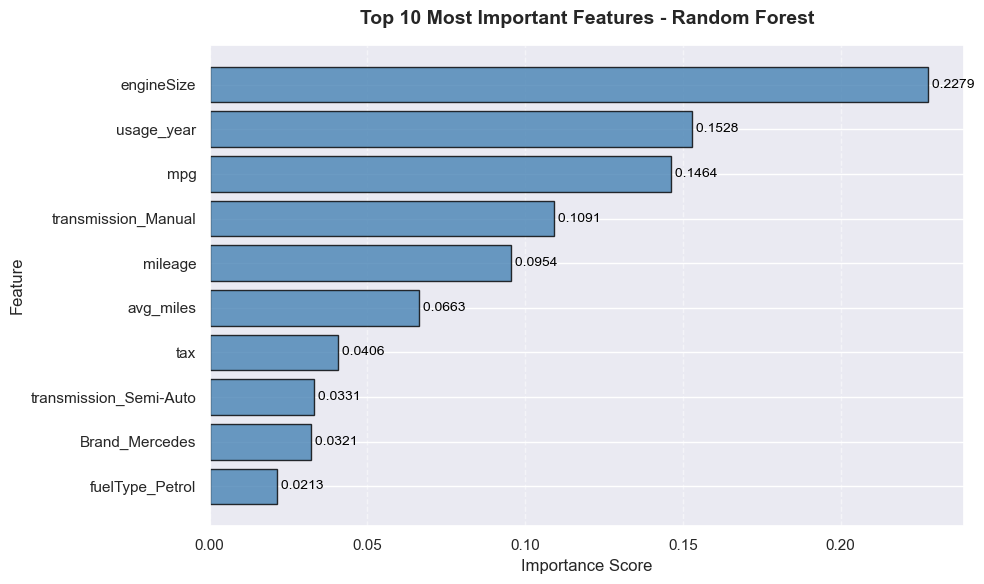

In [30]:
# Create the figure and axis 
fig, ax = plt.subplots(figsize=(10, 6))

# GRAPH 1: Top 10 Feature Importances 
top_10 = importance_df.head(10)

# Create horizontal bar chart
bars = ax.barh(range(len(top_10)), top_10['Importance'].values, color='steelblue', edgecolor='black', alpha=0.8)

# Configure axes and labels
ax.set_yticks(range(len(top_10)))
ax.set_yticklabels(top_10['Feature'].values, fontsize=11)
ax.set_xlabel('Importance Score', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
ax.set_title('Top 10 Most Important Features - Random Forest', fontsize=14, fontweight='bold', pad=15)

# Invert Y-axis to display the most important feature at the top
ax.invert_yaxis()

# Add a light vertical grid for readability
ax.grid(axis='x', linestyle='--', alpha=0.5)

# Add the numeric value at the end of each bar
for i, v in enumerate(top_10['Importance'].values):
    ax.text(v, i, f' {v:.4f}', va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()

### 5.2 Results

#### *Interpretation of Feature Importance (Random Forest Regressor)*

In our case we are dealing with a *regression* problem, so the "Importance Score" shown on the X‑axis of the plot represents the *Mean Decrease in Impurity (MDI), so the **average reduction in variance* that each feature produces within the Random Forest.

Every time one of the trees in the forest performs a split using a given variable (for example engineSize), it computes *how much that split reduces the Mean Squared Error (MSE)* in the "child" nodes compared with the "parent" node.

In summary, *the longer the bar in the plot, the more that variable has been crucial in reducing the variance of the price prediction error*.

In our model, the features with the longest bars (such as engineSize, usage_year, and mpg) are therefore the main *drivers of price*: they are the variables the Random Forest relies on the most to distinguish between cheaper cars and higher‑value cars.

By looking at the cumulative importance curve, we see that to explain about *90% of the total variability* of the model it is sufficient to consider *the first 8 features. This means that, if the computational cost of the final model becomes too high for the company, *Cars 4 You could *reduce the dimensionality of its dataset* and of the pipeline by keeping only these main features, while still retaining almost all of the predictive power of the full model.

#### *Detailed Interpretation of Top Features*

*The Top 5 Most Important Features:*

1. *engineSize (22.65%)* - Engine displacement is the most critical factor. 
   Small engines → economical cars (low prices), large engines → sports cars (high prices).

2. *usage_year (15.26%)* - Car age is crucial. New cars retain value, 
   old cars lose value. The feature engineering (usage_year) works very well.

3. *mpg (14.70%)* - Fuel efficiency helps identify engine power. 
   Low MPG = powerful engine = high price.

4. *transmission_Manual (11.15%)* - Transmission type influences price. 
   Manual transmission < automatic transmission in market value.

5. *mileage (9.24%)* - Total mileage matters, but less than age 
   (because age is more stable).

*Key Insight:* To explain *90% of the variance, only **8 features out of 23* are needed. 
If Cars 4 You faced latency issues it could use a "lean" model 
with these 8 features while maintaining R²≈0.95 instead of 0.969.

*Difference from Linear Correlation:*
- The linear correlation of mpg is -0.29 (low), but its importance in RF is 14.70% 
  (high). Random Forest discovers that mpg interacts in a complex way with engineSize.
- The linear correlation of tax is 0.30 (moderate), but its importance in RF is only 
  3.96%. Random Forest recognizes that tax is collinear with engineSize (redundant).

This demonstrates that *Random Forest captures non-linear relationships* that 
linear models cannot see.